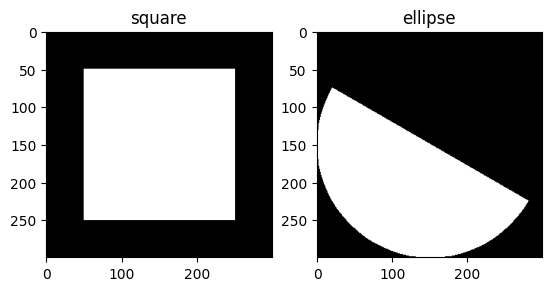

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

plt.subplot(121);plt.imshow(square,cmap='gray');plt.title("square");
plt.subplot(122);plt.imshow(ellipse,cmap='gray');plt.title("ellipse");

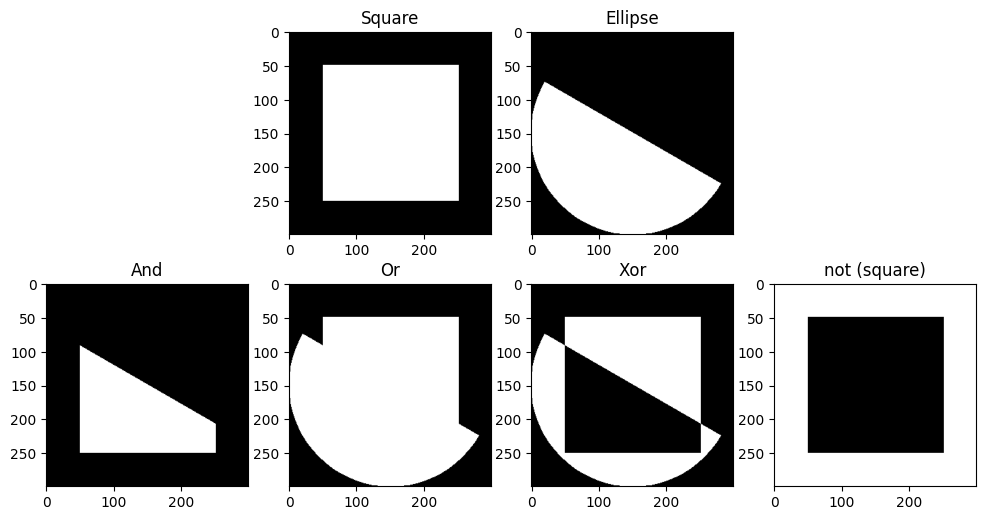

In [2]:
bitwise_and = cv2.bitwise_and(square, ellipse)

bitwise_or = cv2.bitwise_or(square, ellipse)


bitwise_xor = cv2.bitwise_xor(square, ellipse)


bitwise_not_sq = cv2.bitwise_not(square)

plt.figure(figsize=[12,6])
plt.subplot(242);plt.imshow(square,cmap='gray');plt.title("Square");
plt.subplot(243);plt.imshow(ellipse,cmap='gray');plt.title("Ellipse");
plt.subplot(245);plt.imshow(bitwise_and,cmap='gray');plt.title("And");
plt.subplot(246);plt.imshow(bitwise_or,cmap='gray');plt.title("Or");
plt.subplot(247);plt.imshow(bitwise_xor,cmap='gray');plt.title("Xor");
plt.subplot(248);plt.imshow(bitwise_not_sq,cmap='gray');plt.title("not (square)");

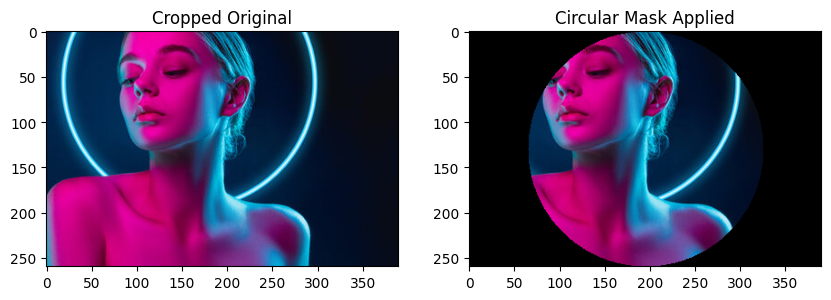

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('./woman.jpg')
if image is None:
    print("Error: couldn't load './woman.jpg'")
else:
    cropped = image[100:600, 150:650]

    h, w = cropped.shape[:2]

    mask = np.zeros((h, w), dtype=np.uint8)
    center = (w // 2, h // 2)      
    radius = min(w, h) // 2
    cv2.circle(mask, center, radius, 255, -1)   

    # Apply mask → keep only inside circle
    output_image = cv2.bitwise_and(cropped, cropped, mask=mask)

    plt.figure(figsize=(10, 6))
    plt.subplot(121); plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)); plt.title("Cropped Original")
    plt.subplot(122); plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)); plt.title("Circular Mask Applied")
    plt.show()

In [ ]:
h, w = cropped.shape[:2]
png_image = np.zeros((h, w, 4), np.uint8)

png_image[:, :, 0:3] = cropped

alpha = np.zeros((h, w), np.uint8)
cv2.circle(alpha, (w//2, h//2), min(w, h)//2, 255, -1)

png_image[:, :, 3] = alpha

cv2.imwrite("caw.png", png_image)

print(f"Saved transparent PNG: caw.png  (size: {w}x{h})")

Saved transparent PNG: caw.png  (size: 390x260)


In [8]:
square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1) # 2 : 010

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 2, 3, -1)  # 3 : 011


circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1) # 4 : 100


output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print("--square--")
print(square)
print("--circle1--")
print(circle1)
print("--circle2--")
print(circle2)
print("--output1--")
print(output1)
print("--output2--")
print(output2)

--square--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 3 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle2--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 4 4 4 4 4 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output2--
[[0 0 0 0 0 0 0 0